In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sn 


from torchvision import datasets
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<h2>Exer 5.1</h2>

In [2]:
dataset = datasets.MNIST(root="dataset/", download=True)
labels = dataset.targets.numpy()
dataset = dataset.data.numpy().reshape(-1,784).T

In [3]:
U, S, VT = np.linalg.svd(dataset, full_matrices=False)

Text(0.5, 1.0, 'Sigma')

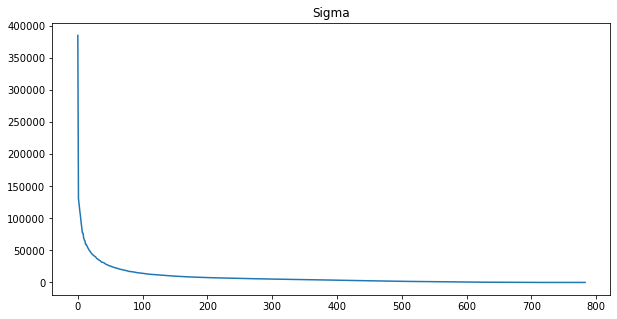

In [19]:
#5.1.a - 5.1.c

plt.figure(figsize=(10,5))
plt.plot(S)
plt.title('Sigma')

<p>Seems like Sigma starts to flatten at around 100-150 modes</p>

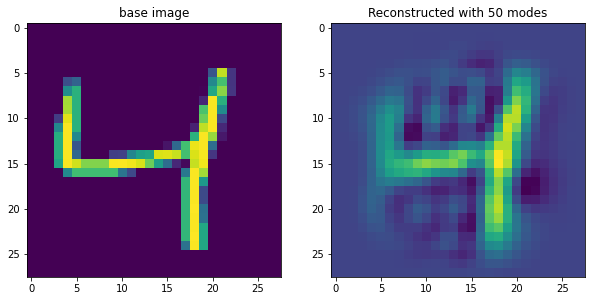

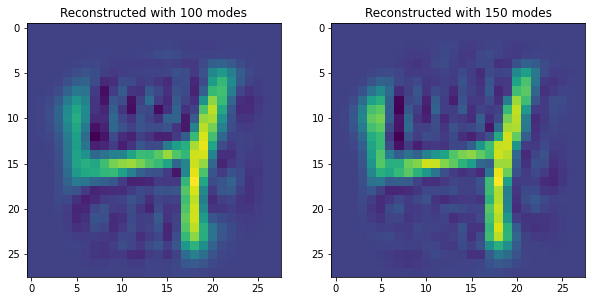

In [30]:
f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(dataset[:,2].reshape(28,28))
ax[0].set_title('base image')

ax[1].imshow((U[:,:50]@np.diag(S)[:50,:]@VT[:,:50])[:,2].reshape(28,28))
ax[1].set_title('Reconstructed with 50 modes');

f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow((U[:,:100]@np.diag(S)[:100,:]@VT[:,:100])[:,2].reshape(28,28))
ax[0].set_title('Reconstructed with 100 modes');

ax[1].imshow((U[:,:150]@np.diag(S)[:150,:]@VT[:,:150])[:,2].reshape(28,28))
ax[1].set_title('Reconstructed with 150 modes');

<p>At 100 modes, the image started to take shape and didn't really gave a better quality at 150 modes.</p>

<p>Note that U can be seen as the modes/patterns, $\Sigma$ as the singular values, and V as the weights of the modes, .</p>

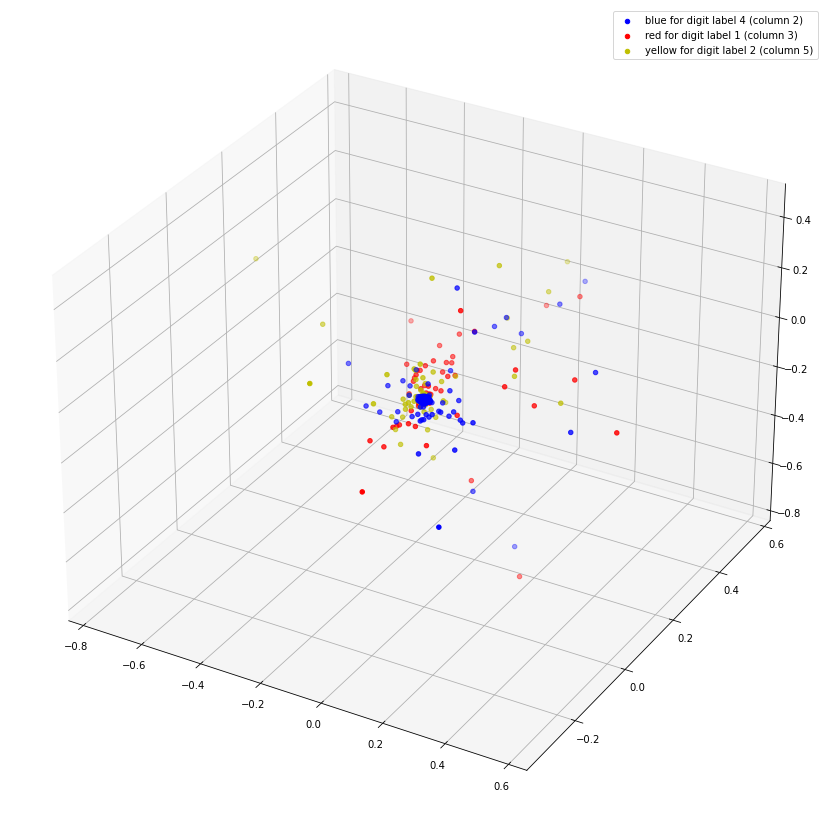

In [29]:
#5.1.d
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter(VT[:,2],VT[:,3],VT[:,5], c='b', label='blue for digit label 4 (column 2)')
ax.scatter(VT[:,3],VT[:,2],VT[:,5], c='r', label='red for digit label 1 (column 3)')
ax.scatter(VT[:,5],VT[:,3],VT[:,2], c='y', label='yellow for digit label 2 (column 5)')
ax.legend();

In [46]:
#5.1.e

Two_Digits_Mask = (labels==2) + (labels==3)

Two_Digits_X, Two_Digits_Y = dataset[:, Two_Digits_Mask], labels[Two_Digits_Mask]

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(Two_Digits_X.T, Two_Digits_Y, test_size=0.3, shuffle=True)

lda = LinearDiscriminantAnalysis()

LDA1 = lda.fit(X_train1, Y_train1)

test_labels1 = LDA.predict(X_test1)

LDA.accu1 = accuracy_score(Y_test1,test_labels1)

LDA.accu1 #accuracy

0.9429280397022333

In [48]:
#5.1.f
Three_Digits_Mask = (labels==2) + (labels==3) + (labels==5)

Three_Digits_X, Three_Digits_Y = dataset[:, Three_Digits_Mask], labels[Three_Digits_Mask]

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(Three_Digits_X.T, Three_Digits_Y, test_size=0.3, shuffle=True)

LDA2 = lda.fit(X_train2, Y_train2)

test_labels2 = LDA2.predict(X_test2)

LDA.accu2 = accuracy_score(Y_test2,test_labels2) 

LDA.accu2 #accuracy

0.9310869979059585

In [75]:
#5.1.g - 5.1.h

X_trainN, X_testN, Y_trainN, Y_testN = train_test_split(dataset.T, labels, test_size=0.3, shuffle=True)

LDAN = lda.fit(X_trainN, Y_trainN)
test_labelsLDAN = LDAN.predict(X_testN)

LDA.accuN= accuracy_score(Y_testN,test_labelsLDAN) 

LDA.accuN #accuracy


0.8630555555555556

<AxesSubplot:>

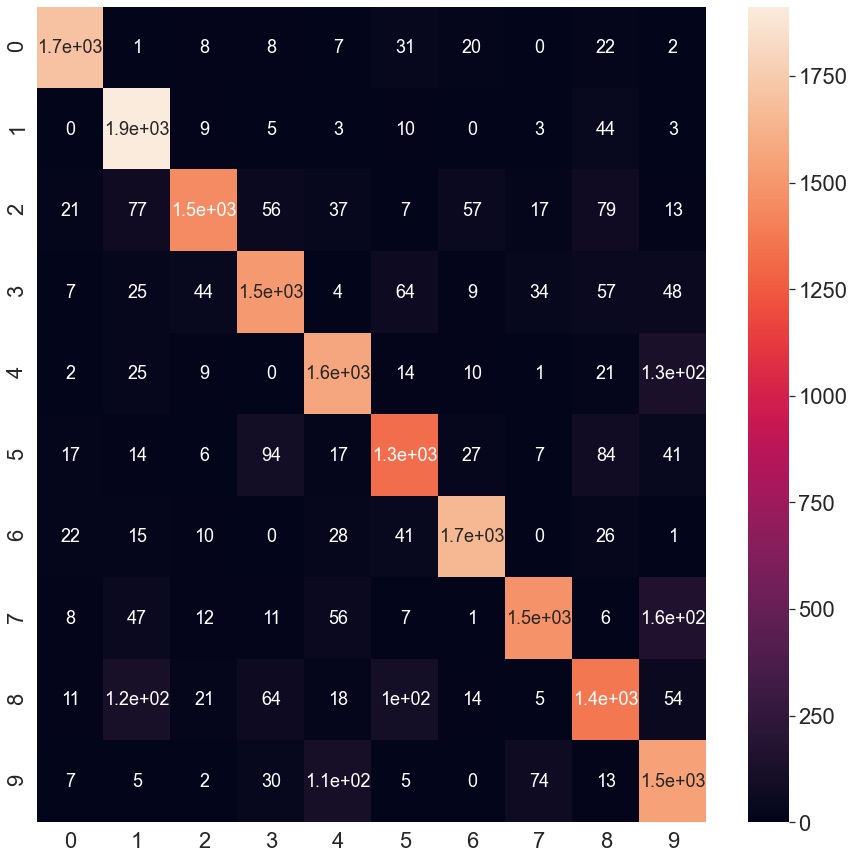

In [77]:
mat = confusion_matrix(Y_testN, test_labelsLDAN)
df_cm = pd.DataFrame(mat, range(10), range(10) )

fig = plt.figure(figsize=(15,15))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 18})

<p>Observe from the heat map that 7 and 9 are the most difficult to separate while 0 and 1 are the easiest.</p>

In [80]:
#5.1.i

#SVM
SVM = SVC(probability=True)

SVMN = SVM.fit(X_trainN, Y_trainN)
test_labelsSVMN = SVMN.predict(X_testN)

SVM.accuN = accuracy_score(Y_testN,test_labelsSVMN) 

SVM.accuN #accuracy

0.9776111111111111

In [81]:
#DT
DT = DecisionTreeClassifier()

DTN = DT.fit(X_trainN, Y_trainN)
test_labelsDTN = DTN.predict(X_testN)

DT.accuN= accuracy_score(Y_testN,test_labelsDTN) 

DT.accuN #accuracy

0.8628333333333333

<p>From LDA we got an accuracy score of 0.863... . From SVM we got 0.978..., and from DT we got 0.862.... Among the three, SVM has the highest accuracy score, while DT has the (slightly) lowest accuracy in terms of separating all 10 digits</p>

In [94]:
#5.1.j.

#Hard

Hard_Digits_Mask = (labels==7) + (labels==9)

Hard_Digits_X, Hard_Digits_Y = dataset[:, Hard_Digits_Mask], labels[Hard_Digits_Mask]
    
X_trainH, X_testH, Y_trainH, Y_testH = train_test_split(Hard_Digits_X.T, Hard_Digits_Y, test_size=0.3, shuffle=True)

LDAH = LDA.fit(X_trainH, Y_trainH)
SVMH = SVM.fit(X_trainH, Y_trainH)
DTH = DT.fit(X_trainH, Y_trainH)

test_labelsLDAH = LDAH.predict(X_testH)
test_labelsSVMH = SVMH.predict(X_testH)
test_labelsDTH = DTH.predict(X_testH)

LDA.accuH = accuracy_score(Y_testH,test_labelsLDAH) 
SVM.accuH = accuracy_score(Y_testH,test_labelsSVMH) 
DT.accuH = accuracy_score(Y_testH,test_labelsDTH) 

#Easy

Easy_Digits_Mask = (labels==0) + (labels==1)

Easy_Digits_X, Easy_Digits_Y = dataset[:, Easy_Digits_Mask], labels[Easy_Digits_Mask]
    
X_trainE, X_testE, Y_trainE, Y_testE = train_test_split(Easy_Digits_X.T, Easy_Digits_Y, test_size=0.3, shuffle=True)

LDAE = LDA.fit(X_trainE, Y_trainE)
SVME = SVM.fit(X_trainE, Y_trainE)
DTE = DT.fit(X_trainE, Y_trainE)

test_labelsLDAE = LDAE.predict(X_testE)
test_labelsSVME = SVME.predict(X_testE)
test_labelsDTE = DTE.predict(X_testE)

LDA.accuE = accuracy_score(Y_testE,test_labelsLDAE) 
SVM.accuE = accuracy_score(Y_testE,test_labelsSVME) 
DT.accuE = accuracy_score(Y_testE,test_labelsDTE) 


|         | **Hard Pair (7,9)** | **Easy Pair (0,1)** |
|:-------:|:-------------------:|:-------------------:|
| **LDA** |        0.9547       |        0.9903       |
| **SVM** |        0.9888       |        0.9987       |
|  **DT** |        0.9678       |        0.9934       |

<p>For both pairs, we got SVM with the highest accuracy and LDA with the lowest.  Note also that the easy pair has higher accuracy on each of the methods</p>